In [31]:
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sys, joblib, json, os

In [10]:
data = {}
for i in glob('*/*results.json'):
    with open(i) as f:
       data[i.split('/')[0].replace('_',' ')]=json.load(f)

with open('state_vector/IQP_Full-Pauli-CRZ/IQP_Full-Pauli-CRZ_results.json') as f:
   data['State Vector']=json.load(f)

In [12]:
data

{'MITIQ ZNE Linear': {'MSE_train': [7.198464241736957],
  'R2_train': 0.9651258566679723,
  'MAE_train': 2.1949735923487412,
  'MSE_test': 6.323822407952399,
  'R2_test': 0.9618811753247203,
  'MAE_test': 2.171659689290157},
 'TREX': {'MSE_train': [3.132182639961054],
  'R2_train': 0.9848256263197421,
  'MAE_train': 1.3663874916465981,
  'MSE_test': 3.104592497322337,
  'R2_test': 0.9812860941596339,
  'MAE_test': 1.495815003624044},
 'MITIQ ZNE Richardson': {'MSE_train': [4.222313174159598],
  'R2_train': 0.9795443097467107,
  'MAE_train': 1.5659000392940636,
  'MSE_test': 2.430928118241696,
  'R2_test': 0.9853468176745548,
  'MAE_test': 1.1393583295872456},
 'without': {'MSE_train': [3.4266423861951587],
  'R2_train': 0.983399067674616,
  'MAE_train': 1.4904774731009032,
  'MSE_test': 3.1386993153454905,
  'R2_test': 0.9810805046075266,
  'MAE_test': 1.4896425064765146},
 'State Vector': {'MSE_train': [2.4221746931865233],
  'R2_train': 0.9882653765318956,
  'MAE_train': 1.1979406377

In [25]:
data_df = pd.DataFrame.from_dict(data).T.reset_index().rename(columns={'R2_train':'Train','R2_test':'Test'}).melt(id_vars=['index'], value_vars=['Train','Test'])

In [26]:
data_df.sort_values(by=['index'])

,index,variable,value
0,MITIQ ZNE Linear,Train,0.965126
5,MITIQ ZNE Linear,Test,0.961881
2,MITIQ ZNE Richardson,Train,0.979544
7,MITIQ ZNE Richardson,Test,0.985347
4,State Vector,Train,0.988265
9,State Vector,Test,0.989123
1,TREX,Train,0.984826
6,TREX,Test,0.981286
3,without,Train,0.983399
8,without,Test,0.981081


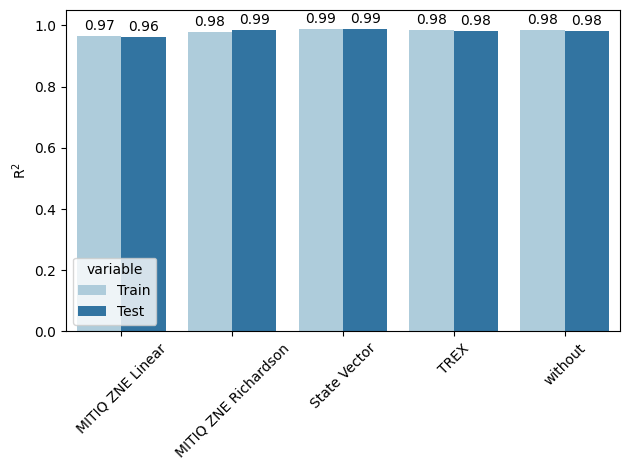

In [32]:
sns.barplot(data=data_df.sort_values(by=['index']),x='index',y='value',hue='variable',palette=sns.color_palette('Paired',2))
plt.xticks(rotation=45)
plt.ylim(0,1.05)
# Add labels on top of the bars
ax = plt.gca()  # Get current axes
for bar in ax.patches:
    # Get the height of the bar
    height = bar.get_height()
    if height > 0:  # Only label non-zero bars
        # Add a text label just above the bar
        ax.text(
            bar.get_x() + bar.get_width() / 2,  # x-coordinate
            height + 0.01,                     # y-coordinate slightly above the bar
            f'{height:.2f}',                   # Label text (formatted to 2 decimals)
            ha='center',                       # Center horizontally
            va='bottom',                       # Align bottom
            fontsize=10                        # Font size
        )
plt.ylabel('R$^{2}$')
plt.xlabel('')
plt.tight_layout()
plt.savefig(os.path.join(os.path.expanduser('~'), 'qregress/images/Function_Fitting/linear_error_mitigation.png'),dpi=300,bbox_inches='tight')
plt.show()